In [1]:
import pandas as pd
import requests

# Your Tiingo API key
api_key = "ADD YOUR API KEY"

# Endpoint for daily prices (AAPL as example)
url = f"https://api.tiingo.com/tiingo/daily/AAPL/prices"

import datetime

end_date = datetime.date.today().strftime("%Y-%m-%d")

params = {
    "token": api_key,
    "startDate": "2022-12-31",
    "endDate": end_date
}

response = requests.get(url, params=params)

data = response.json()
df1 = pd.DataFrame(data)

In [2]:
import requests
import json
from datetime import datetime

# Alpha Vantage News + Sentiment
API_KEY = 'ADD YOUR API KEY'  # Replace with your free key

def fetch_news_sentiment(ticker, time_from, time_to, limit=1000):
    url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={time_from}&time_to={time_to}&limit={limit}&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()
    if 'feed' in data:
        articles = data['feed']
        df = pd.DataFrame(articles)
        # Key columns: title, summary, time_published (ISO), ticker_sentiment_score, overall_sentiment_score (-1 to 1)
        df['time_published'] = pd.to_datetime(df['time_published'])
        return df[['title', 'summary', 'time_published', 'overall_sentiment_score']]
    else:
        print(f"Error: {data.get('Note', 'Check API key/limits')}")
        return pd.DataFrame()

# Fetch full range (if >1000 articles, it prioritizes recent; split for all)
news_df = fetch_news_sentiment("AAPL", '20200101T0000', '20251001T2359')

# If you need to split by year for more coverage (e.g., loop over years)
all_news = []
years = range(2020, 2026)
for year in years:
    time_from = f'{year}0101T0000'
    time_to = f'{year}1231T2359'
    yearly_df = fetch_news_sentiment("AAPL", time_from, time_to)
    all_news.append(yearly_df)
news_df = pd.concat(all_news, ignore_index=True).drop_duplicates(subset=['title'])


Error: Check API key/limits
Error: Check API key/limits


In [3]:
news_df

,title,summary,time_published,overall_sentiment_score
0,"Apple, AMC, Meta, And How Elon Musk Is Reactin...",Benzinga examined the prospects for many inves...,2022-12-31 19:03:10,-0.079733
1,Bulls In A Bear Market: These 10 Stocks Clocke...,2022 would go down as one of the worst years f...,2022-12-31 16:11:14,0.064077
2,Where Will Unity Software Stock Be in 3 Years?,The game-engine developer still has a lot to p...,2022-12-31 15:45:00,0.202065
3,3 Unstoppable Growth Stocks to Buy After a Sto...,These companies have grown by triple-digit per...,2022-12-31 14:00:00,0.152163
4,"Even in an Advertising Slowdown, These 3 Stock...","Ad sales growth will slow in 2023, but these s...",2022-12-31 12:00:00,0.151938
...,...,...,...,...
2726,Google Parent Alphabet Just Hit $3 Trillion - ...,Alphabet hit $3T market cap after stock jumped...,2025-09-15 16:33:49,0.105190
2727,Apple's TV+ Business Gets a Boost With 22 Emmy...,Apple TV+ shines with a record 22 Emmy wins an...,2025-09-15 16:31:00,0.285107
2728,Apple Breaks Emmy Awards Records With 'The Stu...,Apple's streaming platform is a big winner at ...,2025-09-15 16:23:17,0.506798
2729,Apple iPhone 17 Demand 'Tracking Modestly Ahea...,An analyst looks at demand for the iPhone 17 i...,2025-09-15 15:41:28,0.230547


In [4]:
df1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2023-01-03T00:00:00.000Z,125.07,130.9000,124.1700,130.280,112117471,123.342829,129.092319,122.455258,128.480881,112117471,0.0,1.0
1,2023-01-04T00:00:00.000Z,126.36,128.6557,125.0800,126.890,89113633,124.615015,126.879012,123.352691,125.137696,89113633,0.0,1.0
2,2023-01-05T00:00:00.000Z,125.02,127.7700,124.7600,127.130,80962708,123.293520,126.005543,123.037110,125.374381,80962708,0.0,1.0
3,2023-01-06T00:00:00.000Z,129.62,130.2900,124.8900,126.010,87754715,127.829995,128.490743,123.165315,124.269848,87754715,0.0,1.0
4,2023-01-09T00:00:00.000Z,130.15,133.4100,129.8900,130.465,70790813,128.352676,131.567657,128.096267,128.663326,70790813,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2025-10-24T00:00:00.000Z,262.82,264.1300,259.1800,261.190,38253717,262.820000,264.130000,259.180000,261.190000,38253717,0.0,1.0
706,2025-10-27T00:00:00.000Z,268.81,269.1200,264.6501,264.880,44888152,268.810000,269.120000,264.650100,264.880000,44888152,0.0,1.0
707,2025-10-28T00:00:00.000Z,269.00,269.8900,268.1500,268.985,41534759,269.000000,269.890000,268.150000,268.985000,41534759,0.0,1.0
708,2025-10-29T00:00:00.000Z,269.70,271.4100,267.1100,269.275,51086742,269.700000,271.410000,267.110000,269.275000,51086742,0.0,1.0


In [7]:
news_df.shape

(2529, 4)

In [8]:
df1.shape

(710, 13)

In [9]:
df1["date"] = pd.to_datetime(df1["date"])
df1["date"] = df1["date"].dt.strftime("%Y-%m-%d")

In [10]:
df_close = df1[["date", "close"]]
df_open = df1[["date", "open"]]
df_high = df1[["date", "high"]]
df_low = df1[["date", "low"]]

In [11]:
import ta

df_close['SMA_10'] = ta.trend.sma_indicator(df_close['close'], window=10)
df_close['EMA_20'] = ta.trend.ema_indicator(df_close['close'], window=20)
df_close['RSI_14'] = ta.momentum.rsi(df_close['close'], window=14)


df_open['SMA_10'] = ta.trend.sma_indicator(df_open['open'], window=10)
df_open['EMA_20'] = ta.trend.ema_indicator(df_open['open'], window=20)
df_open['RSI_14'] = ta.momentum.rsi(df_open['open'], window=14)

df_high['SMA_10'] = ta.trend.sma_indicator(df_high['high'], window=10)
df_high['EMA_20'] = ta.trend.ema_indicator(df_high['high'], window=20)
df_high['RSI_14'] = ta.momentum.rsi(df_high['high'], window=14)

df_low['SMA_10'] = ta.trend.sma_indicator(df_low['low'], window=10)
df_low['EMA_20'] = ta.trend.ema_indicator(df_low['low'], window=20)
df_low['RSI_14'] = ta.momentum.rsi(df_low['low'], window=14)

/tmp/ipykernel_3010/3816520549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['SMA_10'] = ta.trend.sma_indicator(df_close['close'], window=10)
/tmp/ipykernel_3010/3816520549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['EMA_20'] = ta.trend.ema_indicator(df_close['close'], window=20)
/tmp/ipykernel_3010/3816520549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [12]:
df_high.isnull().sum()

date       0
high       0
SMA_10     9
EMA_20    19
RSI_14    13
dtype: int64

In [13]:
df_close.dropna(inplace=True)
df_open.dropna(inplace=True)
df_high.dropna(inplace=True)
df_low.dropna(inplace=True)

/tmp/ipykernel_3010/585029010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.dropna(inplace=True)
/tmp/ipykernel_3010/585029010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open.dropna(inplace=True)
/tmp/ipykernel_3010/585029010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.dropna(inplace=True)
/tmp/ipykernel_3010/585029010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [14]:
df_close.shape

(691, 5)

In [15]:
df_open.shape

(691, 5)

In [16]:
news_df["date"] = pd.to_datetime(news_df["time_published"])
news_df["date"] = news_df["date"].dt.strftime("%Y-%m-%d")

In [17]:
news_df = news_df[["date", "overall_sentiment_score"]]

In [18]:
combined_df_close = df_close.merge(news_df, on='date', how='left')

In [19]:
combined_df_close['overall_sentiment_score'] = combined_df_close['overall_sentiment_score'].fillna(0)

In [20]:
combined_df_open = df_open.merge(news_df, on='date', how='left')

In [21]:
combined_df_open['overall_sentiment_score'] = combined_df_open['overall_sentiment_score'].fillna(0)

In [22]:
combined_df_high = df_high.merge(news_df, on='date', how='left')

In [23]:
combined_df_high['overall_sentiment_score'] = combined_df_high['overall_sentiment_score'].fillna(0)

In [24]:
combined_df_low = df_low.merge(news_df, on='date', how='left')

In [25]:
combined_df_low['overall_sentiment_score'] = combined_df_low['overall_sentiment_score'].fillna(0)

In [26]:
combined_df_low

,date,low,SMA_10,EMA_20,RSI_14,overall_sentiment_score
0,2023-01-31,142.28,139.01400,135.327692,79.387695,0.000000
1,2023-02-01,141.32,139.64300,135.898388,74.580020,0.000000
2,2023-02-02,148.17,141.08300,137.067113,82.652701,0.000000
3,2023-02-03,147.83,142.44400,138.092150,81.273072,0.000000
4,2023-02-06,150.78,143.73200,139.300516,83.799774,0.000000
...,...,...,...,...,...,...
2192,2025-10-30,268.48,260.57402,256.707056,68.783350,-0.184538
2193,2025-10-30,268.48,260.57402,256.707056,68.783350,0.240581
2194,2025-10-30,268.48,260.57402,256.707056,68.783350,0.199264
2195,2025-10-30,268.48,260.57402,256.707056,68.783350,0.253488


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

features = ['open', 'overall_sentiment_score']
df_features_open = combined_df_open[features].copy()

# Create lagged prices (e.g., 60 days)
for i in range(1, 61):
    df_features_open[f'open_lag_{i}'] = df_features_open['open'].shift(i)

# Drop NaN from lags
df_features_open = df_features_open.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features_open)

# Create sequences for LSTM
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0])  # Predict next close    
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X, y, test_size=0.2, shuffle=False)

In [28]:
features = ['close', 'overall_sentiment_score']
df_features_close = combined_df_close[features].copy()

# Create lagged prices (e.g., 60 days)
for i in range(1, 61):
    df_features_close[f'close_lag_{i}'] = df_features_close['close'].shift(i)

# Drop NaN from lags
df_features_close = df_features_close.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features_close)

# Create sequences for LSTM
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0])  # Predict next close    
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X_train_close, X_test_close, y_train_close, y_test_close = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
features = ['high', 'overall_sentiment_score']
df_features_high = combined_df_high[features].copy()

# Create lagged prices (e.g., 60 days)
for i in range(1, 61):
    df_features_high[f'close_lag_{i}'] = df_features_high['high'].shift(i)

# Drop NaN from lags
df_features_high = df_features_high.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features_high)

# Create sequences for LSTM
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0])  # Predict next close    
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
features = ['low', 'overall_sentiment_score']
df_features_low = combined_df_low[features].copy()

# Create lagged prices (e.g., 60 days)
for i in range(1, 61):
    df_features_low[f'close_lag_{i}'] = df_features_low['low'].shift(i)

# Drop NaN from lags
df_features_low = df_features_low.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features_low)

# Create sequences for LSTM
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 0])  # Predict next close    
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

model_close = Sequential()
model_close.add(LSTM(50, return_sequences=True, input_shape=(X_train_close.shape[1], X_train_close.shape[2]), activation='relu'))  # Relu for hidden units
model_close.add(Dropout(0.2))
model_close.add(LSTM(50, return_sequences=False, activation='relu'))  # Relu for hidden units
model_close.add(Dropout(0.2))
model_close.add(Dense(25, activation='relu'))  # Relu for non-linearity
model_close.add(Dense(1, activation='linear'))  # Linear for regression output

model_close.compile(optimizer='adam', loss='mean_squared_error')

2025-10-31 10:42:39.002324: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-31 10:42:39.012707: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-31 10:42:39.523437: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-31 10:42:41.399574: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-poin

In [32]:
model_high = Sequential()
model_high.add(LSTM(50, return_sequences=True, input_shape=(X_train_high.shape[1], X_train_high.shape[2]), activation='relu'))  # Relu for hidden units
model_high.add(Dropout(0.2))
model_high.add(LSTM(50, return_sequences=False, activation='relu'))  # Relu for hidden units
model_high.add(Dropout(0.2))
model_high.add(Dense(25, activation='relu'))  # Relu for non-linearity
model_high.add(Dense(1, activation='linear'))  # Linear for regression output

model_high.compile(optimizer='adam', loss='mean_squared_error')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model_low = Sequential()
model_low.add(LSTM(50, return_sequences=True, input_shape=(X_train_low.shape[1], X_train_low.shape[2]), activation='relu'))  # Relu for hidden units
model_low.add(Dropout(0.2))
model_low.add(LSTM(50, return_sequences=False, activation='relu'))  # Relu for hidden units
model_low.add(Dropout(0.2))
model_low.add(Dense(25, activation='relu'))  # Relu for non-linearity
model_low.add(Dense(1, activation='linear'))  # Linear for regression output

model_low.compile(optimizer='adam', loss='mean_squared_error')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model_close.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,101 (172.27 KB)

 Trainable params: 44,101 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_high.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,101 (172.27 KB)

 Trainable params: 44,101 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_low.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        22,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,101 (172.27 KB)

 Trainable params: 44,101 (172.27 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_close.fit(X_train_close, y_train_close)

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0398


In [36]:
model_high.fit(X_train_high, y_train_high)

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0251


In [37]:
model_low.fit(X_train_low, y_train_low)

52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0191


In [40]:
y_test_close_predict = model_close.predict(X_test_close)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [41]:
y_test_high_predict = model_high.predict(X_test_high)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [42]:
y_test_low_predict = model_low.predict(X_test_low)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [43]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test_close_predict, y_test_close))

0.05316794820303399

In [44]:
math.sqrt(mean_squared_error(y_test_high_predict, y_test_high))

0.10833311775978716

In [45]:
math.sqrt(mean_squared_error(y_test_low_predict, y_test_low))

0.08080576733201983

In [54]:
y_train_close_predict = model_close.predict(X_train_close)

25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [55]:
y_train_high_predict = model_high.predict(X_train_high)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [56]:
y_train_low_predict = model_low.predict(X_train_low)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [57]:
math.sqrt(mean_squared_error(y_train_close_predict, y_train_close))

0.0694412414322211

In [58]:
math.sqrt(mean_squared_error(y_train_high_predict, y_train_high))

0.07645673004858415

In [59]:
math.sqrt(mean_squared_error(y_train_low_predict, y_train_low))

0.07713507716688622

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


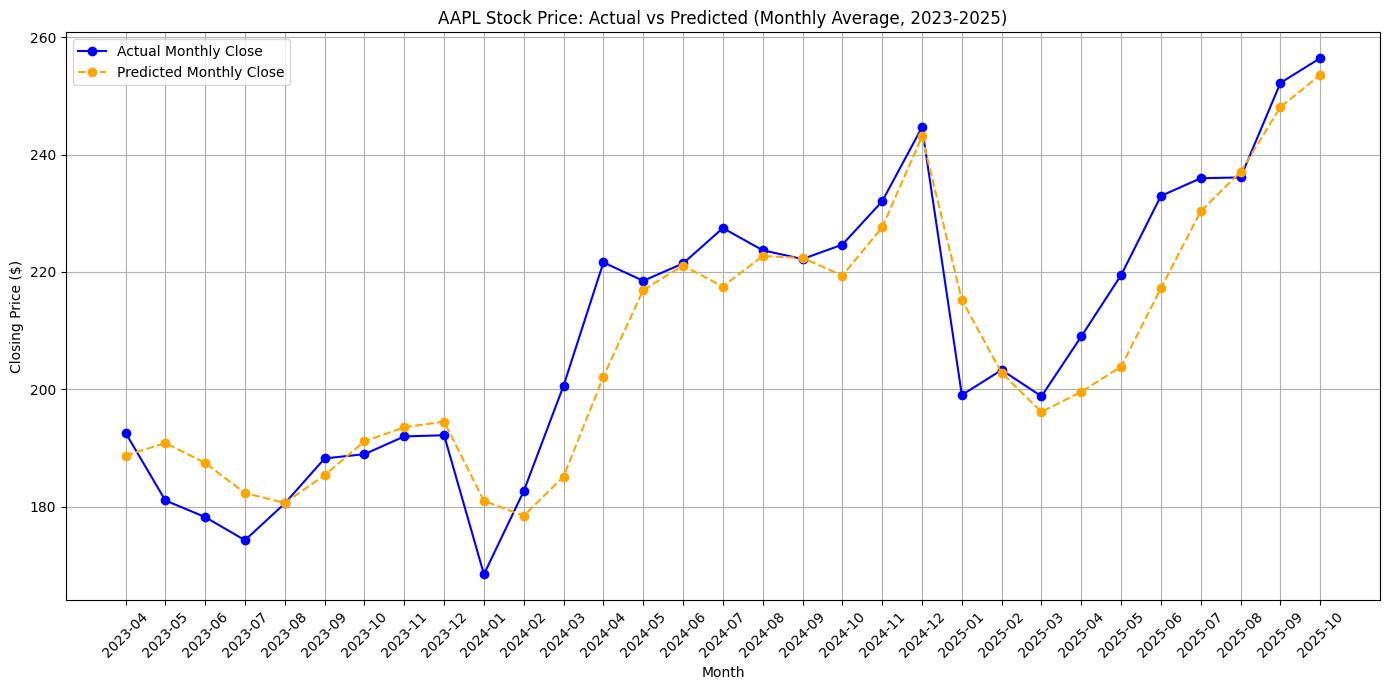

In [60]:
import matplotlib.pyplot as plt

y_train_actual = y_train_close  # Actual training closes
y_test_actual = y_test_close    # Actual test closes

# Get predictions (assuming model_close is your trained model)
y_train_predict = model_close.predict(X_train_close)  # Predicted training closes
y_test_predict = model_close.predict(X_test_close)    # Predicted test closes

# Reshape for inverse_transform (pad with zeros for other features)
y_train_actual_reshaped = np.column_stack((y_train_actual, np.zeros((len(y_train_actual), X_train_close.shape[2] - 1))))
y_test_actual_reshaped = np.column_stack((y_test_actual, np.zeros((len(y_test_actual), X_test_close.shape[2] - 1))))
y_train_predict_reshaped = np.column_stack((y_train_predict.flatten(), np.zeros((len(y_train_predict), X_train_close.shape[2] - 1))))
y_test_predict_reshaped = np.column_stack((y_test_predict.flatten(), np.zeros((len(y_test_predict), X_test_close.shape[2] - 1))))

# Inverse transform to get original prices
y_train_actual_original = scaler.inverse_transform(y_train_actual_reshaped)[:, 0]
y_test_actual_original = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]
y_train_predict_original = scaler.inverse_transform(y_train_predict_reshaped)[:, 0]
y_test_predict_original = scaler.inverse_transform(y_test_predict_reshaped)[:, 0]

# Get corresponding dates from combined_df_close (adjust based on window size, e.g., 60)
train_dates = pd.to_datetime(combined_df_close['date'].iloc[60:60 + len(y_train_close)])  # Ensure datetime
test_dates = pd.to_datetime(combined_df_close['date'].iloc[60 + len(y_train_close):60 + len(y_train_close) + len(y_test_close)])  # Ensure datetime

# Create DataFrames for actual and predicted values with dates
train_df = pd.DataFrame({'date': train_dates, 'actual': y_train_actual_original, 'predict': y_train_predict_original})
test_df = pd.DataFrame({'date': test_dates, 'actual': y_test_actual_original, 'predict': y_test_predict_original})
full_df = pd.concat([train_df, test_df])

# Verify and convert 'date' to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(full_df['date']):
    full_df['date'] = pd.to_datetime(full_df['date'])

# Aggregate by month (monthly average)
monthly_data = full_df.groupby(full_df['date'].dt.to_period('M')).mean()[['actual', 'predict']]

# Create month-wise x-axis labels and positions
months = monthly_data.index.astype(str)  # e.g., '2020-01', '2020-02'
x_positions = range(len(months))

# Plotting monthly data
plt.figure(figsize=(14, 7))
plt.plot(x_positions, monthly_data['actual'], label='Actual Monthly Close', color='blue', marker='o')
plt.plot(x_positions, monthly_data['predict'], label='Predicted Monthly Close', color='orange', linestyle='--', marker='o')
plt.xticks(x_positions, months, rotation=45)
plt.title(f'AAPL Stock Price: Actual vs Predicted (Monthly Average, {train_dates.min().year}-{test_dates.max().year})')
plt.xlabel('Month')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Last histori

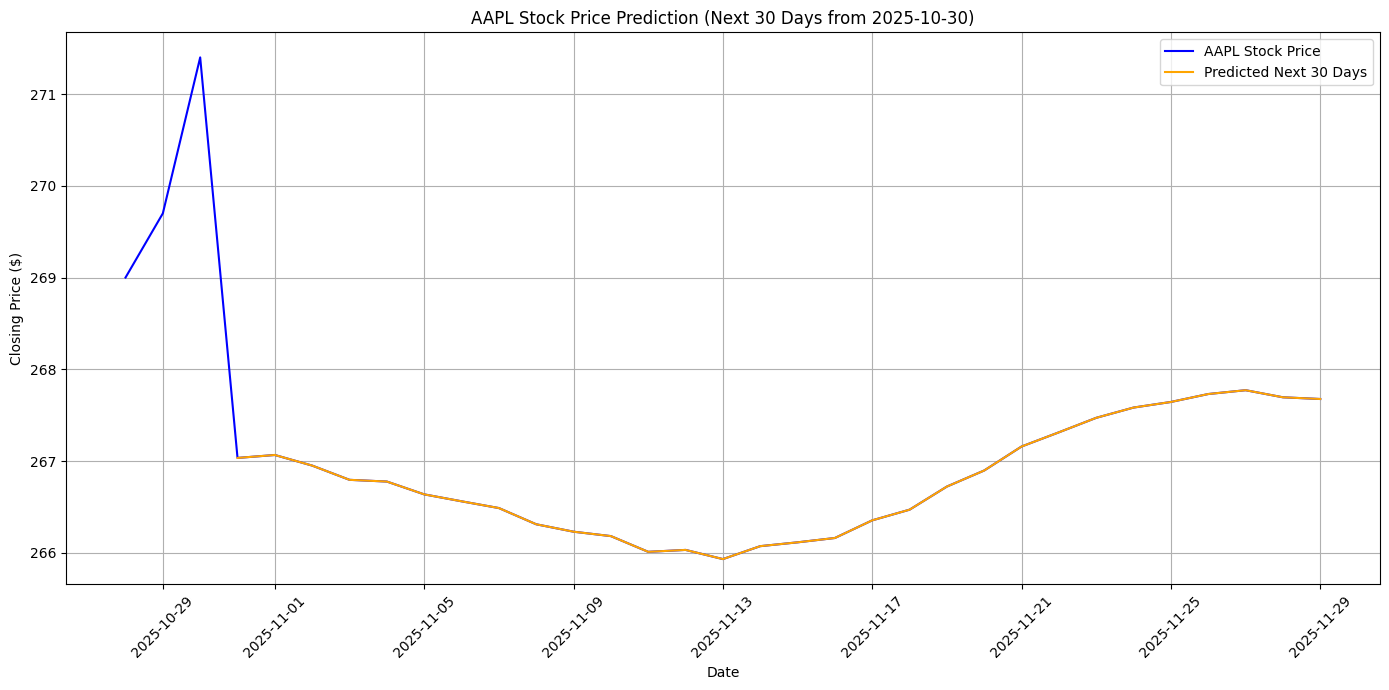

In [61]:
last_sequence = X_test_close[-1]  # Shape: (timesteps, features)
future_predictions = []

# Iterate to predict the next 30 days
current_sequence = last_sequence.copy()
for _ in range(30):
    # Reshape for prediction (1, timesteps, features)
    next_pred = model_close.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
    future_predictions.append(next_pred[0, 0])  # Extract the scalar prediction
    # Update the sequence: roll and replace the last value with the prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1, 0] = next_pred[0, 0]  # Assume 'close' is the first feature

# Reshape predictions for inverse transform (pad with zeros for other features)
future_predictions_reshaped = np.column_stack((future_predictions, np.zeros((len(future_predictions), X_test_close.shape[2] - 1))))

# Inverse transform to get original prices
future_predictions_original = scaler.inverse_transform(future_predictions_reshaped)[:, 0]

# Generate future dates (starting from the day after the last date, ensure naive datetime)
last_date = pd.to_datetime(combined_df_close['date'].iloc[-1]).replace(tzinfo=None)  # Remove timezone if any
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Get historical data for context (last 60 days)
last_60_dates = pd.to_datetime(combined_df_close['date'].iloc[-60:])
last_60_closes = combined_df_close['close'].iloc[-60:]

# Debugging: Check date transition
print("Last historical date:", last_60_dates.iloc[-1])
print("First predicted date:", future_dates[0])

# Convert DatetimeIndex to Series for concatenation
last_60_dates_series = pd.Series(last_60_dates)
future_dates_series = pd.Series(future_dates)

# Combine dates and values
all_dates = pd.concat([last_60_dates_series, future_dates_series]).reset_index(drop=True)
all_values = np.concatenate([last_60_closes, future_predictions_original])

# Plotting with continuous x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_dates, all_values, label='AAPL Stock Price', color='blue')


# Highlight predictions with a different style
plt.plot(all_dates.iloc[len(last_60_closes):], future_predictions_original, label='Predicted Next 30 Days', color='orange')

plt.title(f'AAPL Stock Price Prediction (Next 30 Days from {last_date.date()})')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


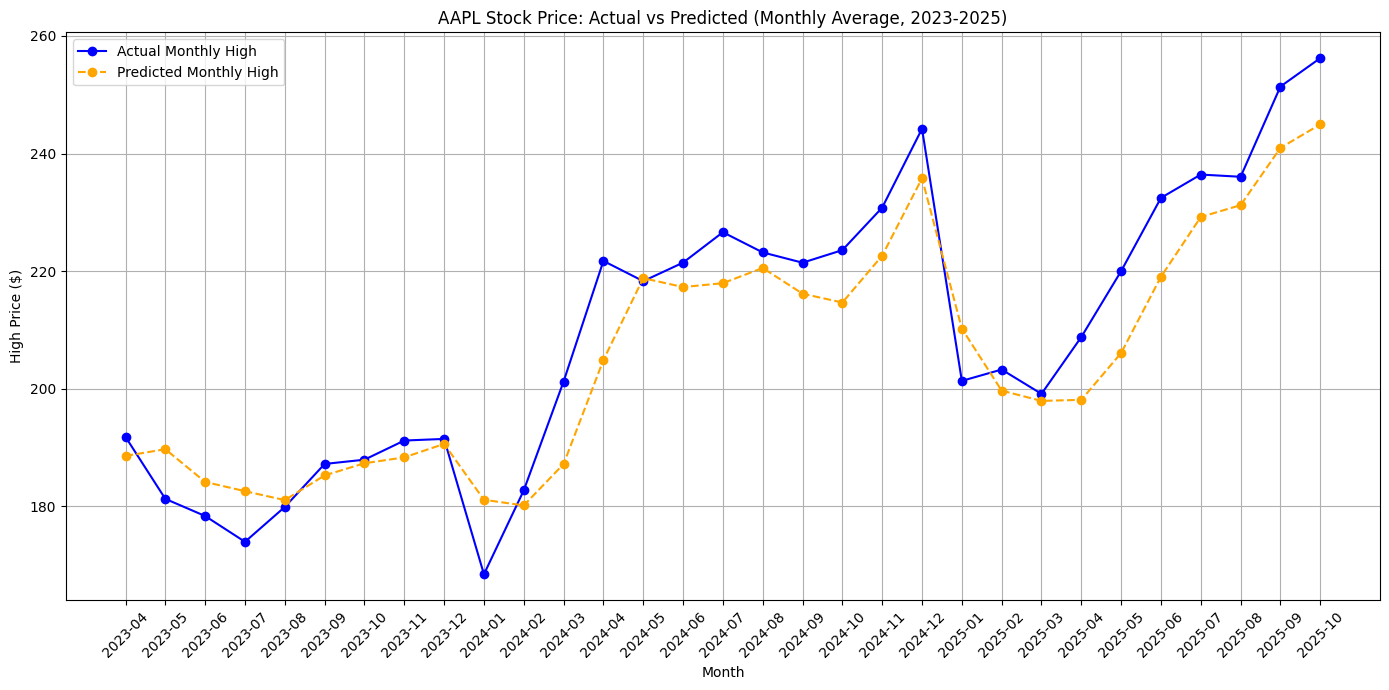

In [62]:
y_train_actual = y_train_high  # Actual training highs
y_test_actual = y_test_high    # Actual test highs

# Get predictions (assuming model_high is your trained model)
y_train_predict = model_high.predict(X_train_high)  # Predicted training highs
y_test_predict = model_high.predict(X_test_high)    # Predicted test highs

# Reshape for inverse_transform (pad with zeros for other features)
y_train_actual_reshaped = np.column_stack((y_train_actual, np.zeros((len(y_train_actual), X_train_high.shape[2] - 1))))
y_test_actual_reshaped = np.column_stack((y_test_actual, np.zeros((len(y_test_actual), X_test_high.shape[2] - 1))))
y_train_predict_reshaped = np.column_stack((y_train_predict.flatten(), np.zeros((len(y_train_predict), X_train_high.shape[2] - 1))))
y_test_predict_reshaped = np.column_stack((y_test_predict.flatten(), np.zeros((len(y_test_predict), X_test_high.shape[2] - 1))))

# Inverse transform to get original prices
y_train_actual_original = scaler.inverse_transform(y_train_actual_reshaped)[:, 0]
y_test_actual_original = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]
y_train_predict_original = scaler.inverse_transform(y_train_predict_reshaped)[:, 0]
y_test_predict_original = scaler.inverse_transform(y_test_predict_reshaped)[:, 0]

# Get corresponding dates from combined_df_high (adjust based on window size, e.g., 60)
train_dates = pd.to_datetime(combined_df_high['date'].iloc[60:60 + len(y_train_high)])  # Ensure datetime
test_dates = pd.to_datetime(combined_df_high['date'].iloc[60 + len(y_train_high):60 + len(y_train_high) + len(y_test_high)])  # Ensure datetime

# Create DataFrames for actual and predicted values with dates
train_df = pd.DataFrame({'date': train_dates, 'actual': y_train_actual_original, 'predict': y_train_predict_original})
test_df = pd.DataFrame({'date': test_dates, 'actual': y_test_actual_original, 'predict': y_test_predict_original})
full_df = pd.concat([train_df, test_df])

# Verify and convert 'date' to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(full_df['date']):
    full_df['date'] = pd.to_datetime(full_df['date'])

# Aggregate by month (monthly average)
monthly_data = full_df.groupby(full_df['date'].dt.to_period('M')).mean()[['actual', 'predict']]

# Create month-wise x-axis labels and positions
months = monthly_data.index.astype(str)  # e.g., '2020-01', '2020-02'
x_positions = range(len(months))

# Plotting monthly data
plt.figure(figsize=(14, 7))
plt.plot(x_positions, monthly_data['actual'], label='Actual Monthly High', color='blue', marker='o')
plt.plot(x_positions, monthly_data['predict'], label='Predicted Monthly High', color='orange', linestyle='--', marker='o')
plt.xticks(x_positions, months, rotation=45)
plt.title(f'AAPL Stock Price: Actual vs Predicted (Monthly Average, {train_dates.min().year}-{test_dates.max().year})')
plt.xlabel('Month')
plt.ylabel('High Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

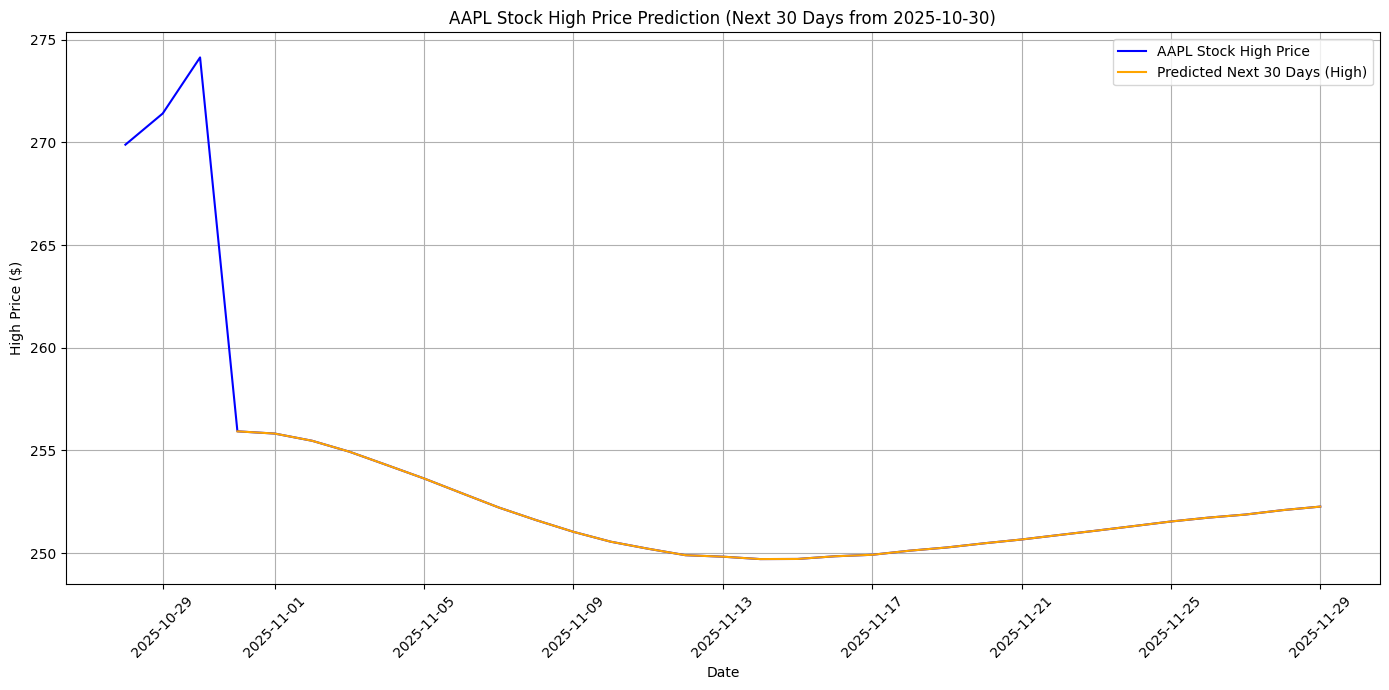

In [64]:
last_sequence = X_test_high[-1]  # Shape: (timesteps, features)
future_predictions = []

# Iterate to predict the next 30 days
current_sequence = last_sequence.copy()
for _ in range(30):
    # Reshape for prediction (1, timesteps, features)
    next_pred = model_high.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
    future_predictions.append(next_pred[0, 0])  # Extract the scalar prediction
    # Update the sequence: roll and replace the last value with the prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1, 0] = next_pred[0, 0]  # Assume 'high' is the first feature

# Reshape predictions for inverse transform (pad with zeros for other features)
future_predictions_reshaped = np.column_stack((future_predictions, np.zeros((len(future_predictions), X_test_high.shape[2] - 1))))

# Inverse transform to get original prices
future_predictions_original = scaler.inverse_transform(future_predictions_reshaped)[:, 0]

# Generate future dates (starting from the day after the last date, ensure naive datetime)
last_date = pd.to_datetime(combined_df_high['date'].iloc[-1]).replace(tzinfo=None)  # Remove timezone if any
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Get historical data for context (last 60 days)
last_60_dates = pd.to_datetime(combined_df_high['date'].iloc[-60:])
last_60_highs = combined_df_high['high'].iloc[-60:]

# Debugging: Check date transition
print("Last historical date:", last_60_dates.iloc[-1])
print("First predicted date:", future_dates[0])

# Convert DatetimeIndex to Series for concatenation
last_60_dates_series = pd.Series(last_60_dates)
future_dates_series = pd.Series(future_dates)

# Combine dates and values
all_dates = pd.concat([last_60_dates_series, future_dates_series]).reset_index(drop=True)
all_values = np.concatenate([last_60_highs, future_predictions_original])

# Plotting with continuous x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_dates, all_values, label='AAPL Stock High Price', color='blue')

# Highlight predictions with a different style
plt.plot(all_dates.iloc[len(last_60_highs):], future_predictions_original, label='Predicted Next 30 Days (High)', color='orange')

plt.title(f'AAPL Stock High Price Prediction (Next 30 Days from {last_date.date()})')
plt.xlabel('Date')
plt.ylabel('High Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


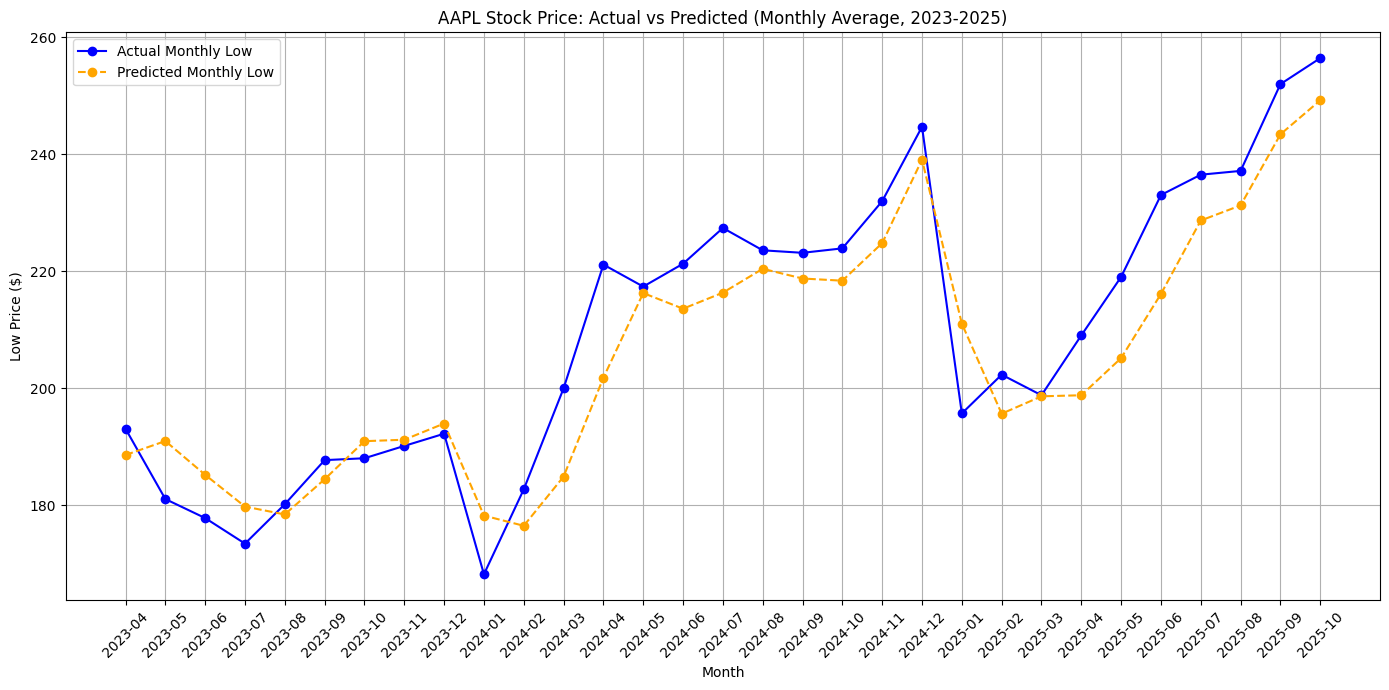

In [63]:
y_train_actual = y_train_low  # Actual training lows
y_test_actual = y_test_low    # Actual test lows

# Get predictions (assuming model_low is your trained model)
y_train_predict = model_low.predict(X_train_low)  # Predicted training lows
y_test_predict = model_low.predict(X_test_low)    # Predicted test lows

# Reshape for inverse_transform (pad with zeros for other features)
y_train_actual_reshaped = np.column_stack((y_train_actual, np.zeros((len(y_train_actual), X_train_low.shape[2] - 1))))
y_test_actual_reshaped = np.column_stack((y_test_actual, np.zeros((len(y_test_actual), X_test_low.shape[2] - 1))))
y_train_predict_reshaped = np.column_stack((y_train_predict.flatten(), np.zeros((len(y_train_predict), X_train_low.shape[2] - 1))))
y_test_predict_reshaped = np.column_stack((y_test_predict.flatten(), np.zeros((len(y_test_predict), X_test_low.shape[2] - 1))))

# Inverse transform to get original prices
y_train_actual_original = scaler.inverse_transform(y_train_actual_reshaped)[:, 0]
y_test_actual_original = scaler.inverse_transform(y_test_actual_reshaped)[:, 0]
y_train_predict_original = scaler.inverse_transform(y_train_predict_reshaped)[:, 0]
y_test_predict_original = scaler.inverse_transform(y_test_predict_reshaped)[:, 0]

# Get corresponding dates from combined_df_low (adjust based on window size, e.g., 60)
train_dates = pd.to_datetime(combined_df_low['date'].iloc[60:60 + len(y_train_low)])  # Ensure datetime
test_dates = pd.to_datetime(combined_df_low['date'].iloc[60 + len(y_train_low):60 + len(y_train_low) + len(y_test_low)])  # Ensure datetime

# Create DataFrames for actual and predicted values with dates
train_df = pd.DataFrame({'date': train_dates, 'actual': y_train_actual_original, 'predict': y_train_predict_original})
test_df = pd.DataFrame({'date': test_dates, 'actual': y_test_actual_original, 'predict': y_test_predict_original})
full_df = pd.concat([train_df, test_df])

# Verify and convert 'date' to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(full_df['date']):
    full_df['date'] = pd.to_datetime(full_df['date'])

# Aggregate by month (monthly average)
monthly_data = full_df.groupby(full_df['date'].dt.to_period('M')).mean()[['actual', 'predict']]

# Create month-wise x-axis labels and positions
months = monthly_data.index.astype(str)  # e.g., '2020-01', '2020-02'
x_positions = range(len(months))

# Plotting monthly data
plt.figure(figsize=(14, 7))
plt.plot(x_positions, monthly_data['actual'], label='Actual Monthly Low', color='blue', marker='o')
plt.plot(x_positions, monthly_data['predict'], label='Predicted Monthly Low', color='orange', linestyle='--', marker='o')
plt.xticks(x_positions, months, rotation=45)
plt.title(f'AAPL Stock Price: Actual vs Predicted (Monthly Average, {train_dates.min().year}-{test_dates.max().year})')
plt.xlabel('Month')
plt.ylabel('Low Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

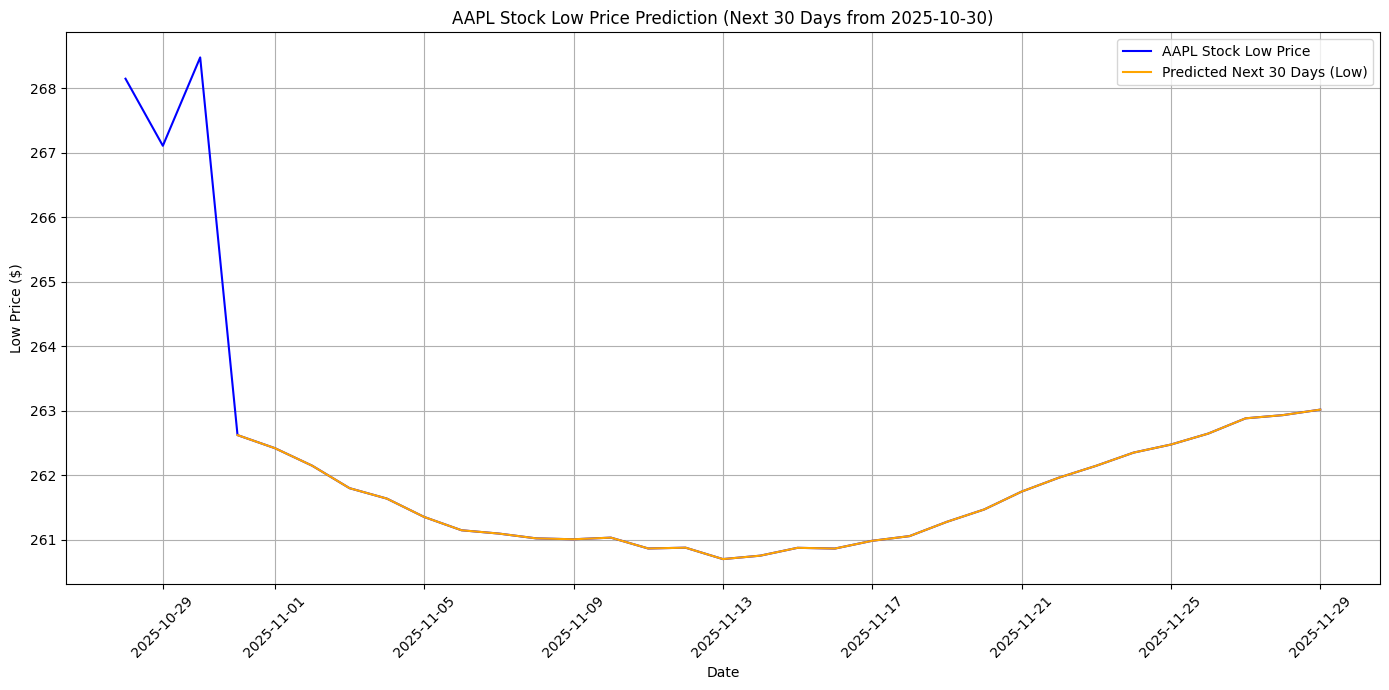

In [65]:
last_sequence = X_test_low[-1]  # Shape: (timesteps, features)
future_predictions = []

# Iterate to predict the next 30 days
current_sequence = last_sequence.copy()
for _ in range(30):
    # Reshape for prediction (1, timesteps, features)
    next_pred = model_low.predict(current_sequence.reshape(1, current_sequence.shape[0], current_sequence.shape[1]))
    future_predictions.append(next_pred[0, 0])  # Extract the scalar prediction
    # Update the sequence: roll and replace the last value with the prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1, 0] = next_pred[0, 0]  # Assume 'low' is the first feature

# Reshape predictions for inverse transform (pad with zeros for other features)
future_predictions_reshaped = np.column_stack((future_predictions, np.zeros((len(future_predictions), X_test_low.shape[2] - 1))))

# Inverse transform to get original prices
future_predictions_original = scaler.inverse_transform(future_predictions_reshaped)[:, 0]

# Generate future dates (starting from the day after the last date, ensure naive datetime)
last_date = pd.to_datetime(combined_df_low['date'].iloc[-1]).replace(tzinfo=None)  # Remove timezone if any
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Get historical data for context (last 60 days)
last_60_dates = pd.to_datetime(combined_df_low['date'].iloc[-60:])
last_60_lows = combined_df_low['low'].iloc[-60:]

# Debugging: Check date transition
print("Last historical date:", last_60_dates.iloc[-1])
print("First predicted date:", future_dates[0])

# Convert DatetimeIndex to Series for concatenation
last_60_dates_series = pd.Series(last_60_dates)
future_dates_series = pd.Series(future_dates)

# Combine dates and values
all_dates = pd.concat([last_60_dates_series, future_dates_series]).reset_index(drop=True)
all_values = np.concatenate([last_60_lows, future_predictions_original])

# Plotting with continuous x-axis
plt.figure(figsize=(14, 7))
plt.plot(all_dates, all_values, label='AAPL Stock Low Price', color='blue')

# Highlight predictions with a different style
plt.plot(all_dates.iloc[len(last_60_lows):], future_predictions_original, label='Predicted Next 30 Days (Low)', color='orange')

plt.title(f'AAPL Stock Low Price Prediction (Next 30 Days from {last_date.date()})')
plt.xlabel('Date')
plt.ylabel('Low Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()